### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。
* 昨天的問題已得到FinMind的回覆：  
  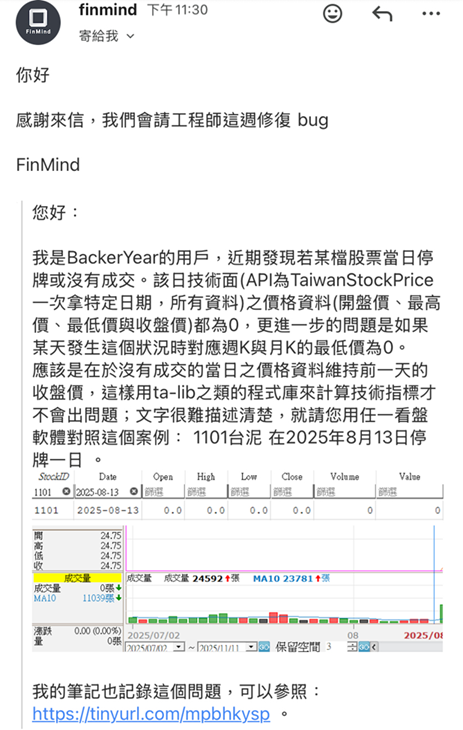  
  昨天把價格都是0的資料列刪除的方法會有問題，主要是會影響到資料庫更新程序。因此會先[手動修改](https://sqlitebrowser.org/)資料庫來做應急對應：  
  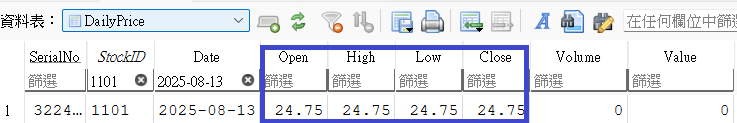  
  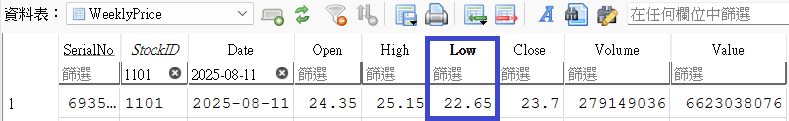
  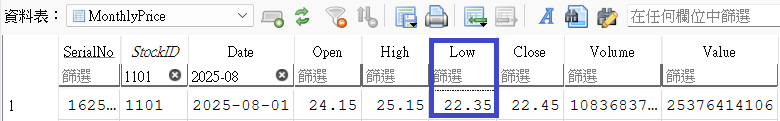    
  最終還是得等[FinMind](https://finmindtrade.com/)把問題做個解決。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2026-01-13 20:11:31.297 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 1598：股票名稱 ＝ 岱宇，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1710：股票名稱 ＝ 東聯，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1722：股票名稱 ＝ 台肥，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1730：股票名稱 ＝ 花仙子，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1783：股票名稱 ＝ 和康生，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2059：股票名稱 ＝ 川湖，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2302：股票名稱 ＝ 麗正，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2305：股票名稱 ＝ 全友，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2315：股票名稱 ＝ 神達，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2317：股票名稱 ＝ 鴻海，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2341：股票名稱 ＝ 英群，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2350：股票名稱 ＝ 環電，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2352：股票名稱 ＝ 佳世達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2361：股票名稱 ＝ 鴻友，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2391：股票名稱 ＝ 合勤，產業類別 ＝ 通信網路業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2396：股票名稱 ＝ 精碟，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2403：股票名稱 ＝ 友尚，產業類別 ＝ 電子通路業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2411：股票名稱 ＝ 飛瑞，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2454：股票名稱 ＝ 聯

2026-01-13 20:11:31.919 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-13 20:11:35.485 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-13 20:11:39.110 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-05
【略過】週Ｋ：2026-01-05


2026-01-13 20:11:46.019 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-06


2026-01-13 20:11:51.648 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-07


2026-01-13 20:11:57.240 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-08


2026-01-13 20:12:02.768 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-09


2026-01-13 20:12:08.296 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-13 20:12:11.887 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-13 20:12:15.464 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-12


2026-01-13 20:12:20.912 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2026-01-13


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


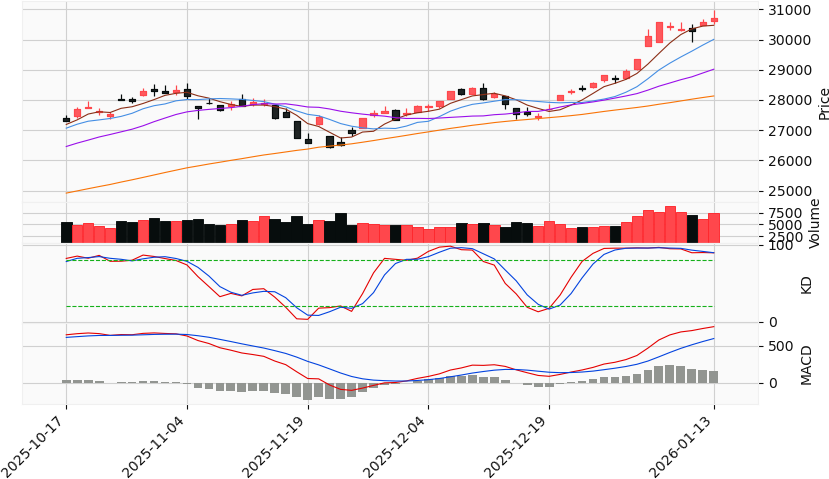

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-01-07 , 2026-01-08 , 2026-01-09 , 2026-01-13 十字線 : 2026-01-07 , 2026-01-08 吞噬 : 2026-01-09 孕育線／懷抱線 : 2026-01-07"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 7491.79億元 ，十日均量 ＝ 6973.08億元）
型態,反轉型態之上升楔形，型態範圍由2025-06-23開始到2025-12-26結束。 底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-07死亡交叉。並且2026-01-13於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-01當週黃金交叉。並且2026-01-05該週在超買區。
整體評價,"價格趨勢 目前為上漲趨勢，近期連續收高並推升高點至約 30,974點，短期多方延續。K線位於5日、10日、20日與60日均線之上，均線呈多頭排列，趨勢結構偏強。 價量關係 上漲段成交量相較前期有放大，顯示資金追價意願仍在。惟近幾日量能未持續擴增，屬「價漲量未再放大」，短線動能有轉為鈍化的跡象。 支撐與壓力 支撐先看 30,472點（短期均線附近），跌破則看 30,529點（近一日低點）與 29,925點（近期波段低點）作為下一道支撐區。壓力落在 30,974點（近期高點），若有效突破，短線上方壓力尚未形成。 KD 指標解讀 K與D皆位於80以上超買區，且D值下滑、K值略走弱，顯示高檔追價力道轉趨保守。短線較偏向高檔震盪，需留意指標若持續走低，容易引發回檔。 MACD 指標解讀 DIF位於MACD線之上且雙線同步上行，趨勢仍偏多。惟OSC柱狀體連續縮小，代表上漲動能雖在但逐步降溫，短線可能轉為緩漲或高檔整理。 綜合評價 整體維持多頭格局，但處於高檔超買區且動能邊際轉弱，短線較可能先高檔整理或小幅回檔再續攻。操作上以 30,472點附近支撐是否守穩作為強弱分界，守穩偏多、失守則回檔風險升高。"


In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

解盤內容：


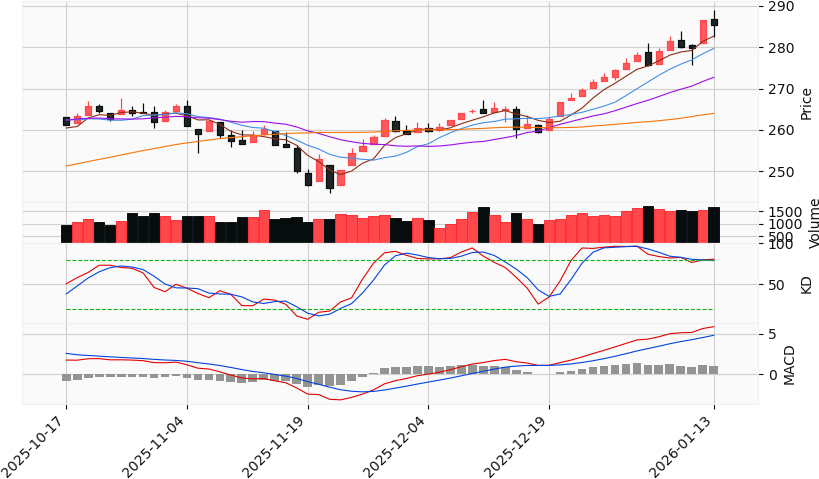

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-13
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1673.77億元 ，十日均量 ＝ 1547.46億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-12黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。並且2026-01-05該週在超買區。
整體評價,價格趨勢 目前為上漲趨勢，近期連續走高並創波段高點後出現小幅回檔收黑。短期均線上彎且位於中期均線之上，結構偏多，回檔屬高檔震盪範圍。 價量關係 上漲段量能同步放大，顯示買盤推升力道仍在。惟最新一日收黑且量能放大，屬高檔換手，短線追價動能略降、波動可能加劇。 支撐與壓力 壓力先看 288.94點（近期高點），突破後才有續攻空間。支撐依序看 282.66點（短期均線附近）與 279.30～279.91點（近五日低檔區），跌破則短線轉為較明顯的回檔整理。 KD 指標解讀 K值位於80附近、D值略低於80，處於高檔區，短線偏向鈍化。K值略高於D值但兩者貼近，顯示多方仍在但追價力道趨於保守，需留意高檔震盪拉回風險。 MACD 指標解讀 DIF位於MACD線之上且兩者皆維持上行，多方趨勢仍延續。柱狀體維持正值但略有縮小，代表上漲動能仍在但有邊際降溫跡象。 綜合評價 整體偏多不變，但已進入高檔震盪、動能放緩階段，短線以守住 282.66點為強弱關鍵。若能放量突破 288.94點，多方可望延伸；反之跌破 279.30～279.91點，回檔整理時間可能拉長。


In [6]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [7]:
results = analysis.screener()

In [8]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

股票代碼 ＝ 8341 ， 股票名稱 ＝ 日友 
股票代碼 ＝ 6217 ， 股票名稱 ＝ 中探針 
股票代碼 ＝ 4987 ， 股票名稱 ＝ 科誠 
股票代碼 ＝ 5410 ， 股票名稱 ＝ 國眾 
股票代碼 ＝ 5425 ， 股票名稱 ＝ 台半 
股票代碼 ＝ 6672 ， 股票名稱 ＝ 騰輝電子-KY 
股票代碼 ＝ 6693 ， 股票名稱 ＝ 廣閎科 
股票代碼 ＝ 2023 ， 股票名稱 ＝ 燁輝 
股票代碼 ＝ 1514 ， 股票名稱 ＝ 亞力 
股票代碼 ＝ 2355 ， 股票名稱 ＝ 敬鵬 
股票代碼 ＝ 3673 ， 股票名稱 ＝ TPK-KY 


* 篩選結果  
  - 仲琦(2419)：穩健續漲  
    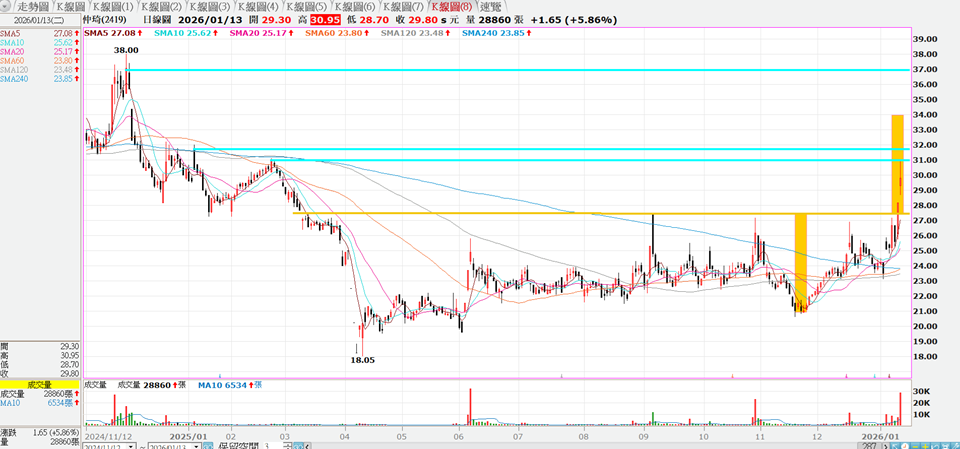  
  - 全友(2305)：技術突破   
    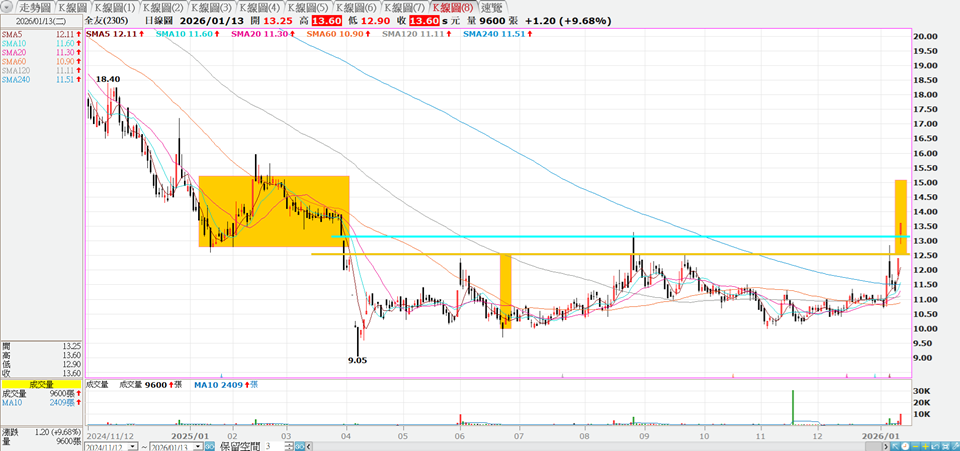   
  - 新復興(4909)：已到目標價（構築第二層底型？）    
    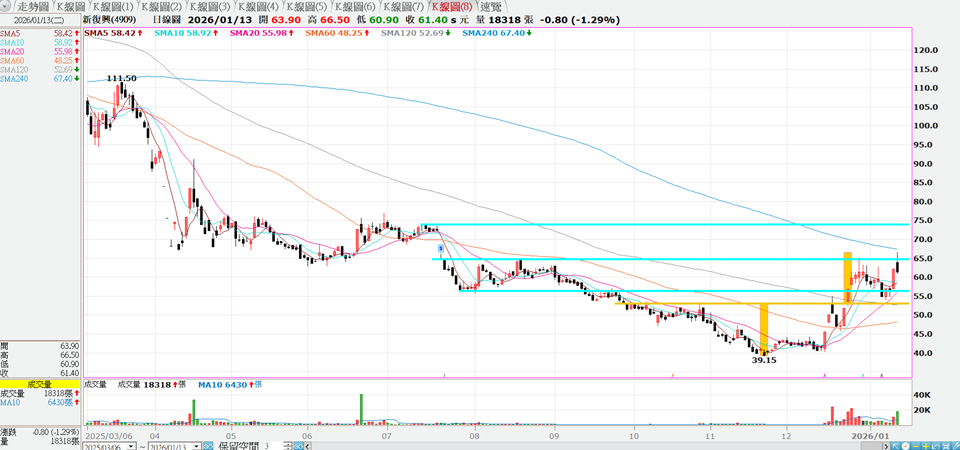  
  - 東捷(8064)：穩健續漲   
    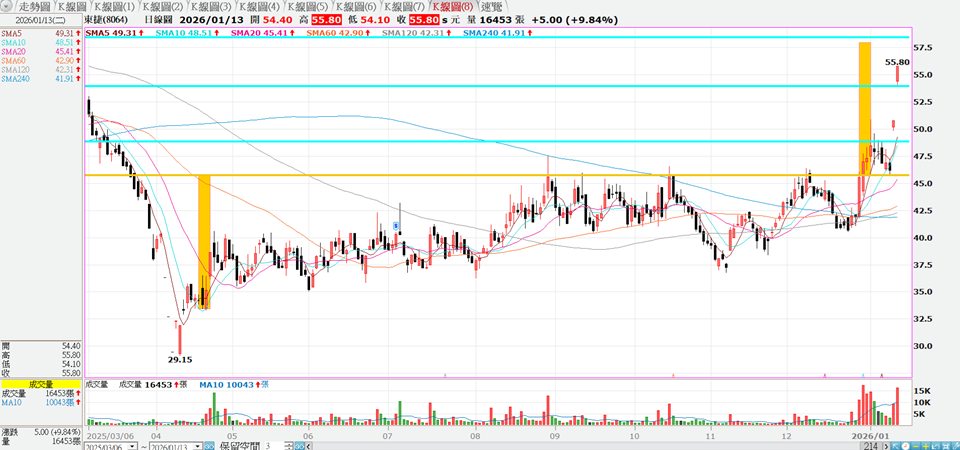  
  - 宏璟(2527)：多頭回檔  
    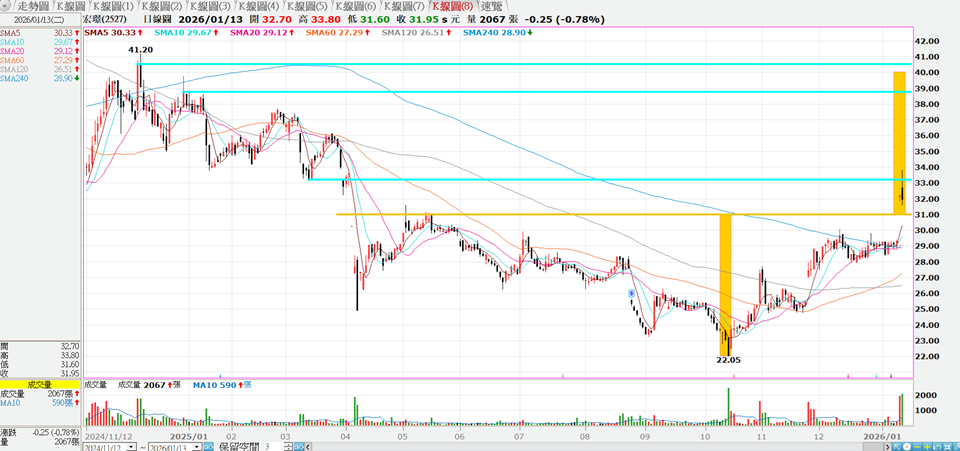  

* 觀察股列表  
  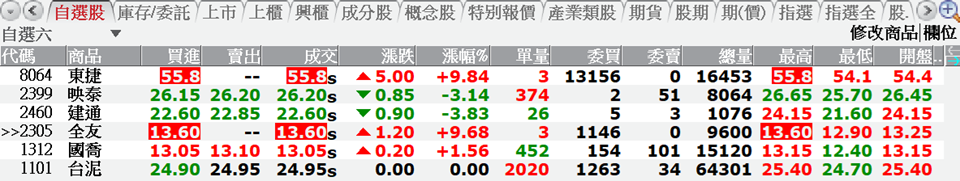  

### 個股解盤  

* 國喬(1312)  
  看法：底型突破後續漲。  

> **盤後**：量化技術分析  

解盤內容：


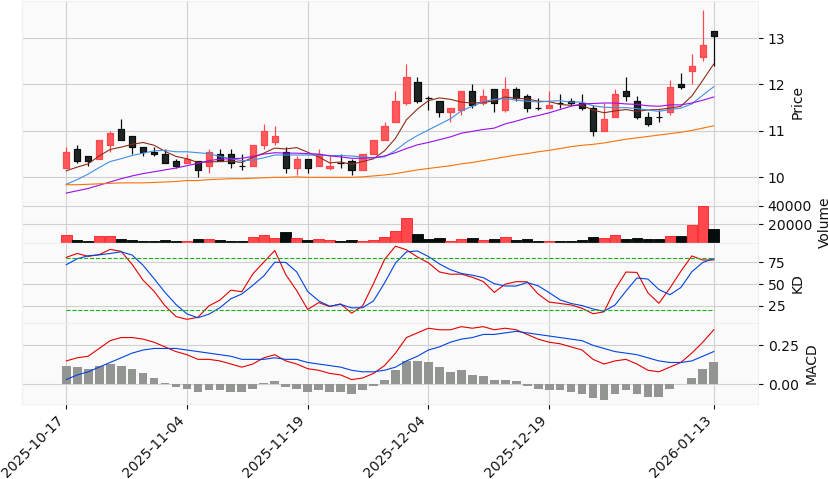

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-09
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：大型股大量（成交量 ＝ 15188張 ，十日均量 ＝ 11429張）
型態,底型反轉之底部型態，型態範圍由2025-08-01開始到2025-10-09結束，2025-10-09時已達估算之目標價（10.19元）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-07黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-05當週黃金交叉。
整體評價,價格趨勢 目前為上漲格局，近幾日連續收高並推升至約 13.05元，短期均線（5日、10日）明顯上彎且位於中期均線（20日、60日）之上。價格維持在各期均線之上，趨勢結構偏多。 價量關係 上漲過程中出現放量推升（先前一度爆量上攻），顯示資金追價意願強。惟最新一日量能較前一交易日明顯縮減但仍收紅，屬於量縮續漲，短線動能仍在但追價力道較前一日降溫。 支撐與壓力 支撐先看短期均線附近約 12.44元（5日線），再看前低與整理區約 12.40元；若跌破，下一道支撐看 11.95元（10日線）。壓力以近期高點區 13.15元～13.60元 為主，屬於短線上檔供給帶。 KD 指標解讀 K值約在 77、D值約在 79，位於高檔區且D值略高於K值，呈現高檔鈍化後的偏整理訊號。未明顯跌破超買線，但短線追價需留意高檔震盪加劇。 MACD 指標解讀 DIF位於MACD線之上且兩者同步上行，屬於偏多趨勢延續。柱狀體（OSC）持續放大轉強，顯示上漲動能仍在增溫。 綜合評價 整體偏多：均線多頭排列、MACD動能增強，短線仍有續攻條件。惟KD處高檔且量能由爆量轉為量縮，短線較可能以高檔震盪、回檔測支撐方式消化漲幅；關鍵觀察 12.44元～12.40元 支撐是否守穩與上攻是否能有效突破 13.15元～13.60元 壓力帶。


In [9]:
stock_analysis(analysis,'1312')

> **盤後**：底部反轉交易策略分析  

In [10]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-10-23'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-09']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-09'
    bottom_price = range_prices.loc['2025-04-09']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-12'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為15.89元


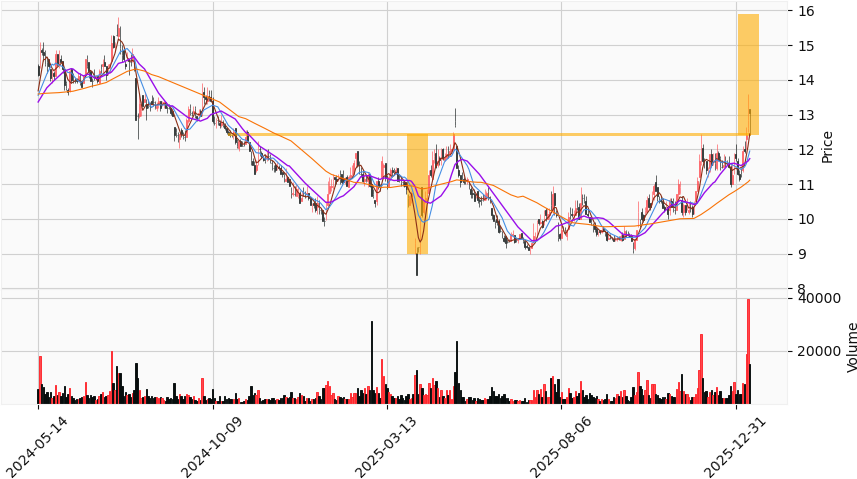

In [11]:
image = mysys.DrawOnKlineChart('1312','2024-05-14','2026-01-13',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-1623)：外資小賣(-811)、投信中立(0)、自營大賣(-821)。  
主力小賣(-882)。  
分公司買賣家數差分散(-47)。  
融資大增(+1214)、融券增(+26)。  

* 台泥(1101)  
  看法：仍未有效突破底型，且籌碼轉弱。  

> **盤後**：量化技術分析  

底型反轉交易策略：


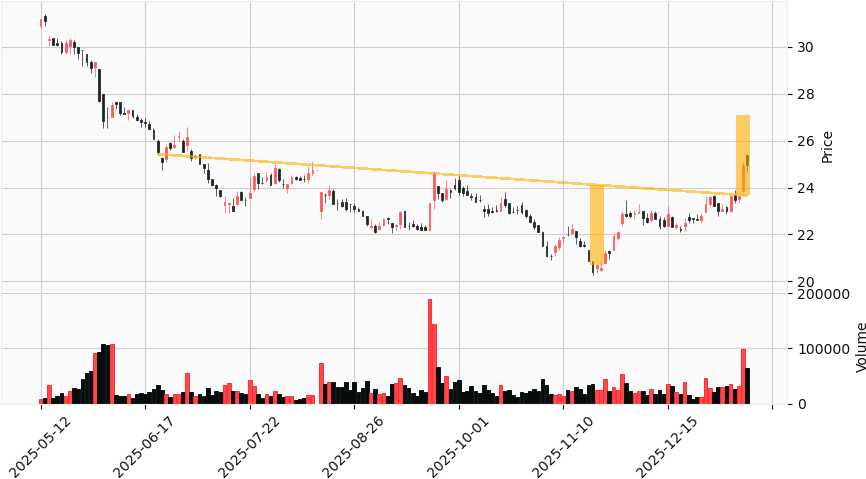

解盤內容：


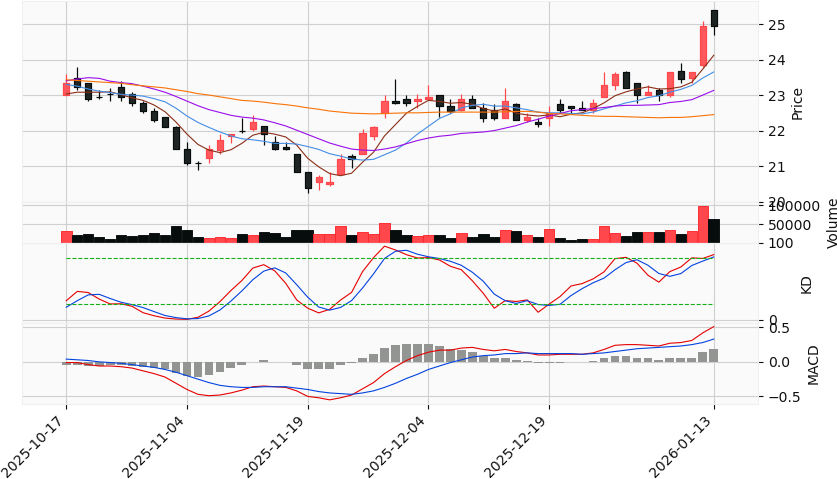

技術分析工具,解盤內容
Ｋ線／Ｋ棒,吞噬 : 2026-01-07
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：大型股爆量（成交量 ＝ 64625張 ，十日均量 ＝ 39513張）
型態,底型反轉之底部型態，型態範圍由2025-06-20開始到2026-01-12結束，估算目標價為27.09元。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2026-01-07黃金交叉。並且2026-01-13於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-17當週黃金交叉。
整體評價,價格趨勢 目前為上漲格局，近兩日以長紅K推升至約 24.95元，並站穩短中期均線之上。短期均線上彎且呈多頭排列，顯示上攻結構仍在延續。 價量關係 上漲段伴隨明顯放量（1/12爆量、1/13量能仍高於前期），屬於量價齊揚，有利多方延續攻勢。惟連兩日高檔量增後，短線容易出現震盪換手，需留意追價力道是否降溫。 支撐與壓力 支撐先看 24.70元（1/13低點）與 24.00元附近（短期均線帶），跌破則回測 23.80元（1/12低點）機率上升。壓力先看 25.40元（1/13高點），若帶量突破，下一道壓力屬於「尚未形成」。 KD指標解讀 K與D同步走高且位於80以上超買區，多方動能偏強但短線過熱。若後續出現K線下彎並跌回80下方，較容易引發高檔回檔。 MACD指標解讀 DIF位於MACD線上方且兩線持續上行，多方趨勢明確。柱狀體同步擴大，代表上攻動能正在增強，短線仍偏多。 綜合評價 整體偏多，屬於放量突破後的續攻型態，但KD進入超買，短線不排除高檔震盪或回檔整理。操作上可優先觀察 24.70元/24.00元支撐是否守穩，以及 25.40元能否有效突破並延續量能。


In [12]:
stock_analysis(analysis,'1101',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [13]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為29.30元


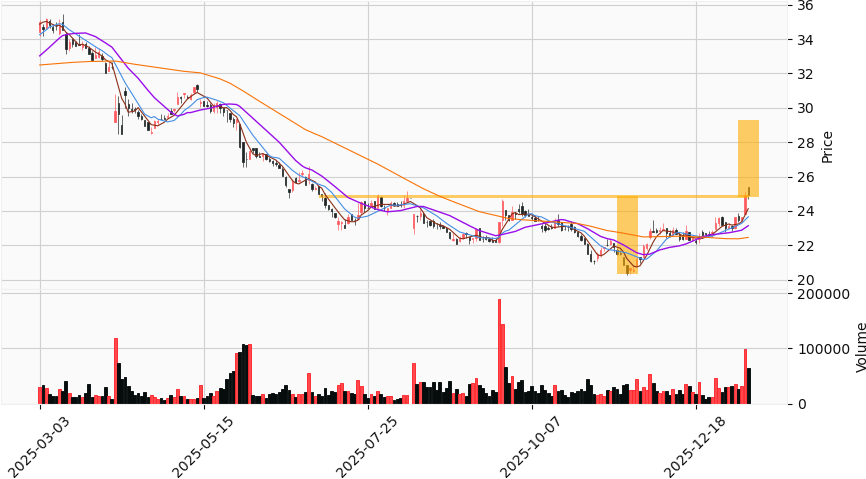

In [14]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-01-13',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-16318)：外資大賣(-15257)、投信中立(-98)、自營大賣(-963)。  
主力小賣(-2540)。  
分公司買賣家數差分散(-5)。  
融資大增(+1207)、融券中立(+6)。  

* 全友(2305)  
  看法：底型突破，同時也跨越假突破壓力。      

> **盤後**：量化技術分析  

解盤內容：


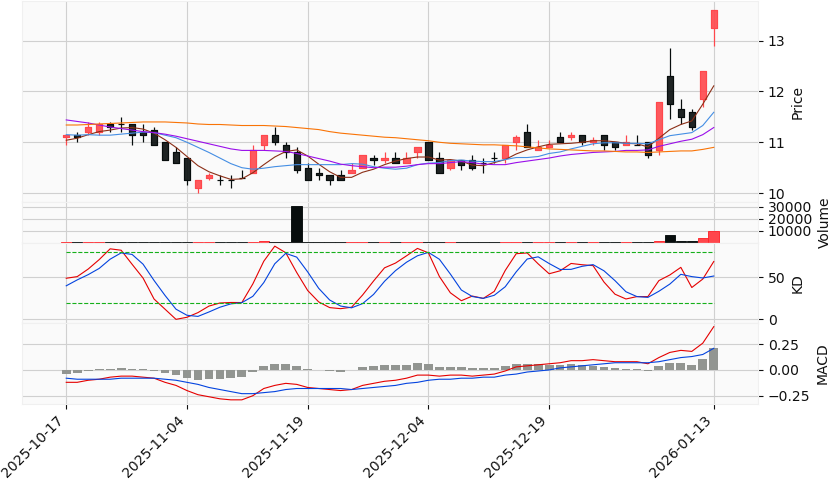

技術分析工具,解盤內容
Ｋ線／Ｋ棒,（未識別出Ｋ線型態）
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：中小型股大量／大型股天量（成交量 ＝ 9635張 ，十日均量 ＝ 2413張）
型態,反轉型態之頭肩底，型態範圍由2025-09-26開始到2026-01-02結束，估算目標價為11.72元。 底型反轉之底部型態，型態範圍由2025-06-11開始到2025-08-04結束，2025-08-15時已達估算之目標價（11.45元）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線走平，長期盤整
ＫＤ指標,於2026-01-13黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-05當週死亡交叉。
整體評價,價格趨勢 目前為上漲格局，近兩日連續紅K並帶出明顯跳升，收盤來到 13.6元，短線轉強。價格已明顯站上5日、10日、20日與60日均線，且短期均線上彎，偏多延續。 價量關係 上漲同時成交量明顯放大，屬於量能跟價的推升型態，短線動能偏強。若後續續攻但量能快速縮減，需留意轉為拉抬後的震盪或回檔。 支撐與壓力 支撐先看 12.11元（5日線），跌破則回測 11.59元（10日線）與 11.29元（20日線）的支撐帶。上方壓力以當日高點附近 13.6元為近端壓力，若有效突破，則尚未形成更明確的上檔壓力區。 KD指標解讀 K值上行且位於D值之上，呈現偏多擴張，短線買盤力道回升。KD尚未進入超買區（>80），但已接近偏強區，追價需留意高檔震盪風險。 MACD指標解讀 DIF位於MACD線之上且雙線同步上彎，顯示趨勢偏多並持續增溫。柱狀體同步放大，代表多方動能正在增強，短線仍有延伸空間。 綜合評價 整體屬於價漲量增、均線多頭排列轉強的型態，短線偏多看待。操作上以 12.11元～11.59元作為回檔防守區較合理，若跌破則多方結構轉弱，需提高停損/降風險的紀律。


In [15]:
stock_analysis(analysis,'2305')

> **盤後**：底部反轉交易策略分析  

In [16]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-31'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-25']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-06-23'
    bottom_price = range_prices.loc['2025-06-23']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-13'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為15.00元


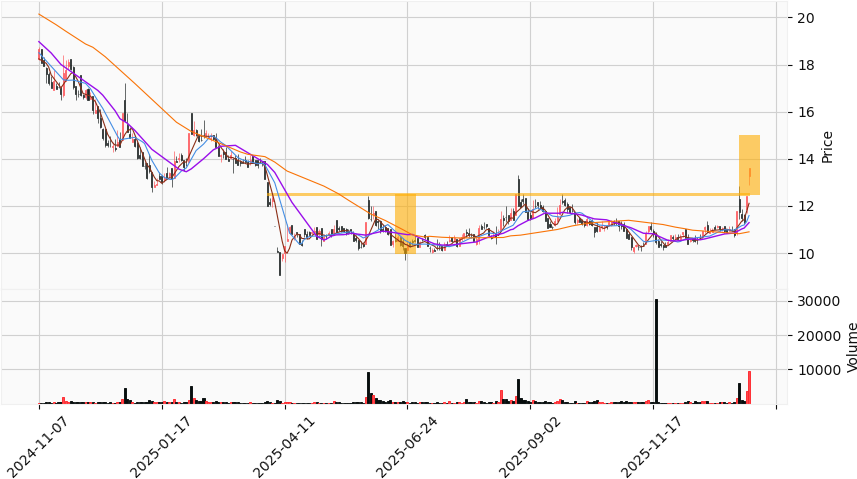

In [17]:
image = mysys.DrawOnKlineChart('2305','2024-11-07','2026-01-13',line_drawing_callback)
display(image)

籌碼面：  
法人大買(+311)：外資大買(+323)、投信中立(0)、自營小賣(-12)。  
主力小賣(-85)。  
分公司買賣家數差分散(-18)。  
融資減(-316)、融券增(+18)。  